# Finetuning RoBERTa for NER: Training History
 

***

## Imports

In [20]:
from transformers import (BertTokenizerFast,
                          RobertaTokenizerFast,
                          AutoTokenizer,
                          BertForTokenClassification,
                          RobertaForTokenClassification,
                          DataCollatorForTokenClassification, 
                          AutoModelForTokenClassification, 
                          TrainingArguments, Trainer)
from datasets import load_dataset, load_metric, concatenate_datasets, DatasetDict
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import torch
import os

## Load Training History:

In [21]:
data_path = "./results/checkpoint-final/training_args.pkl"
with open(data_path, 'rb') as pickle_file:
    training_args = pickle.load(file=pickle_file)

In [22]:
data_path = "./results/checkpoint-final/training_history.pkl"
with open(data_path, 'rb') as pickle_file:
    training_state = pickle.load(file=pickle_file)

## Show Training Parameters

In [23]:
print(training_args)

TrainingArguments(
_n_gpu=2,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=20,
evaluation_strategy=steps,
fp16=True,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_min_num_params=0,
fsdp_transformer_layer_cls_to_wrap=None,
full_determinism=False,
gradient_accumulation_steps=1,
gradient_checkpointing=False,
greater_is_better=None,
group_by_length=False,
half_precision_backend=cuda_amp,
hub_model_id=None,
hub_private_repo=False,
hub_strategy=every_save,
hub_token=<HUB_TOKEN>,
ignore_data_skip=False,
include_inputs_for_metrics=False,
jit_mode_eval=False,
label_

## Show Training History

In [24]:
print(training_state)

TrainerState(epoch=5.0, global_step=160, max_steps=160, num_train_epochs=5, total_flos=387727231040688.0, log_history=[{'loss': 1.7921, 'learning_rate': 1.8912e-05, 'epoch': 0.62, 'step': 20}, {'eval_loss': 1.5292495489120483, 'eval_precision': 0.0, 'eval_recall': 0.0, 'eval_f1': 0.0, 'eval_accuracy': 0.4555591997376189, 'eval_runtime': 4.046, 'eval_samples_per_second': 247.157, 'eval_steps_per_second': 7.909, 'epoch': 0.62, 'step': 20}, {'loss': 1.5263, 'learning_rate': 1.7696e-05, 'epoch': 1.25, 'step': 40}, {'eval_loss': 1.3067489862442017, 'eval_precision': 0.06800348735832606, 'eval_recall': 0.032231404958677684, 'eval_f1': 0.04373423044575273, 'eval_accuracy': 0.508527386028206, 'eval_runtime': 4.1802, 'eval_samples_per_second': 239.22, 'eval_steps_per_second': 7.655, 'epoch': 1.25, 'step': 40}, {'loss': 1.2856, 'learning_rate': 1.6416e-05, 'epoch': 1.88, 'step': 60}, {'eval_loss': 1.0860034227371216, 'eval_precision': 0.1625043967639817, 'eval_recall': 0.19090909090909092, 'eval

In [25]:
training_history = training_state.log_history

# Training
epochs = [epoch.get("epoch") for epoch in  training_history if epoch.get("loss") is not None]
steps = [epoch.get("step") for epoch in  training_history if epoch.get("loss") is not None]
loss = [epoch.get("loss") for epoch in  training_history if epoch.get("loss") is not None]

# Eval
eval_epochs = [epoch.get("epoch") for epoch in  training_history if epoch.get("eval_loss") is not None]
eval_steps = [epoch.get("step") for epoch in  training_history if epoch.get("eval_loss") is not None]
eval_loss = [epoch.get("eval_loss") for epoch in  training_history if epoch.get("eval_loss") is not None]
eval_precision = [epoch.get("eval_precision") for epoch in  training_history if epoch.get("eval_precision") is not None]
eval_recall = [epoch.get("eval_recall") for epoch in  training_history if epoch.get("eval_recall") is not None]
eval_f1 = [epoch.get("eval_recall") for epoch in  training_history if epoch.get("eval_f1") is not None]
eval_accuracy = [epoch.get("eval_accuracy") for epoch in  training_history if epoch.get("eval_accuracy") is not None]

[0.4555591997376189,
 0.508527386028206,
 0.6346343063299442,
 0.7092489340767465,
 0.7591013447031814,
 0.7907510659232535,
 0.7987864873729091,
 0.8206789111183995,
 0.8206789111183995,
 0.8206789111183995]

ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''


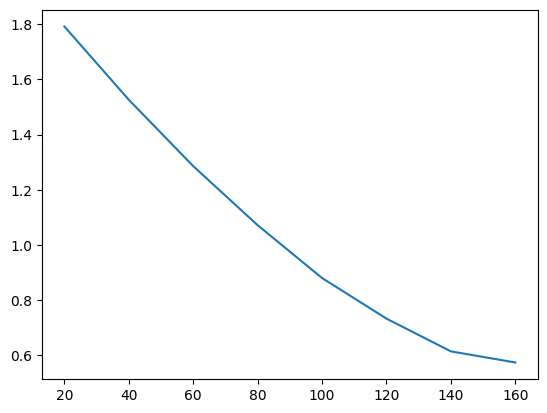

In [28]:
try:
    p = sns.lineplot( x=steps, y=loss)
    p.set_xlabel("Training Steps")
    p.set_ylabel("Loss")
    plt.savefig('./figures/history_loss.png')
except Exception as e:
    print(e)

ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''


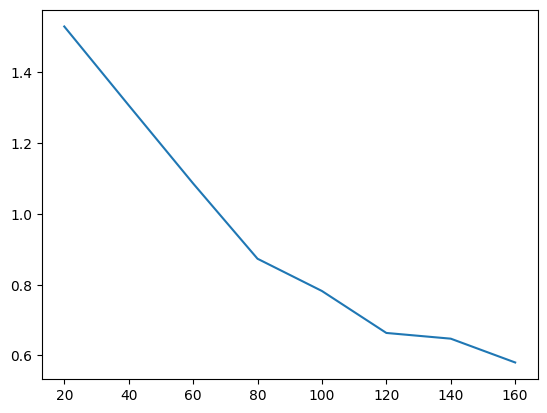

In [29]:
try: 
    p = sns.lineplot(x=eval_steps, y=eval_loss)
    p.set_xlabel("Eval Steps")
    p.set_ylabel("Loss")
    plt.savefig('./figures/history_eval_loss.png')
except Exception as e:
    print(e)

ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''


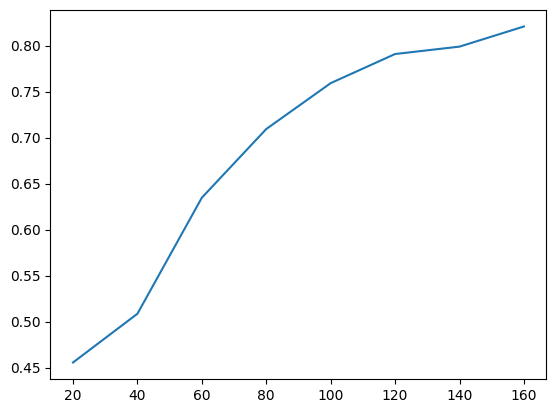

In [30]:
try: 
    p = sns.lineplot(x=eval_steps, y=eval_accuracy)
    p.set_xlabel("Eval Steps")
    p.set_ylabel("Accuracy")
    plt.savefig('./figures/history_eval_accuracy.png')
except Exception as e:
    print(e)